<a href="https://colab.research.google.com/github/danilobsilv/Artificial-Neural-Networks_PracticalProject/blob/main/RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunos: <br><br>
Danilo Bruno da Silva - 2115080048 <br>
Kirk Matos Isaac Sahdo - 2115080036 <br>
Leonardo da Silva Martins - 2115080053


## **2.1. Parte I – Resolvendo um Problema Linearmente Separável**

Nesta parte, todas as equipes devem usar o arquivo dataAll.txt e construir o algoritmo de treina-
mento do neurônio perceptron para resolver o problema de classificação proposto. Alguns aspectos

devem ser considerados:
1. As equipes devem utilizar a função de ativação degrau com θ = 0;
2. O valor da taxa de aprendizado deve ser igual a η = 0,1;
3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de
distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve
ser impresso no início da execução do algoritmo;
4. A cada época deve ser indicado o número de ajustes feitos no vetor de pesos;
5. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os
exemplos presentes no conjunto de treinamento;
6. Ao final, deve-se imprimir:
(a) O número total de ajustes no vetor de pesos;
(b) O número de épocas até a convergência;
(c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

Número total de ajustes nos pesos: 5.500000000000001
Número de épocas até a convergência: 4


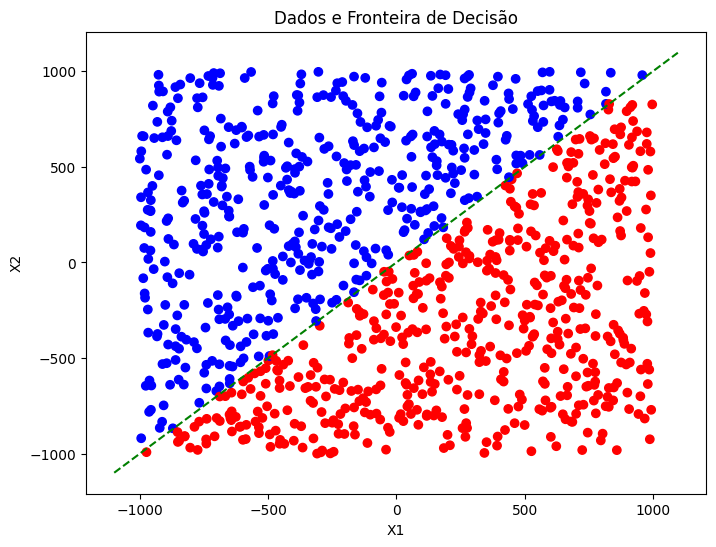

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, tamanho_entrada, taxa_aprendizado=0.1, intervalo_pesos=(-0.5, 0.5)):
        self.pesos = np.random.uniform(intervalo_pesos[0], intervalo_pesos[1], tamanho_entrada + 1)  # Inicialização dos pesos
        self.taxa_aprendizado = taxa_aprendizado

    def prever(self, entradas):
        soma = np.dot(entradas, self.pesos[1:]) + self.pesos[0]
        return 1 if soma > 0 else 0

    def treinar(self, entradas_treinamento, rotulos):
        epocas = 0
        ajustes_totais = 0
        convergiu = False

        while not convergiu:
            ajustes_epoca = 0
            for entradas, rotulo in zip(entradas_treinamento, rotulos):
                previsao = self.prever(entradas)
                ajuste = self.taxa_aprendizado * (rotulo - previsao)
                self.pesos[1:] += ajuste * entradas
                self.pesos[0] += ajuste
                ajustes_epoca += np.abs(ajuste)

            ajustes_totais += ajustes_epoca
            epocas += 1
            if ajustes_epoca == 0:
                convergiu = True

        return epocas, ajustes_totais

    def treinar(self, entradas_treinamento, rotulos, max_epocas=100):
      epocas = 0
      ajustes_totais = 0
      convergiu = False

      while not convergiu and epocas < max_epocas:
          ajustes_epoca = 0
          for entradas, rotulo in zip(entradas_treinamento, rotulos):
              previsao = self.prever(entradas)
              ajuste = self.taxa_aprendizado * (rotulo - previsao)
              self.pesos[1:] += ajuste * entradas
              self.pesos[0] += ajuste
              ajustes_epoca += np.abs(ajuste)

          ajustes_totais += ajustes_epoca
          epocas += 1
          if ajustes_epoca == 0:
              convergiu = True

      return epocas, ajustes_totais

def plotar_dados_e_linha(dados_treinamento, rotulos, perceptron):
    plt.figure(figsize=(8, 6))
    plt.scatter(dados_treinamento[:, 0], dados_treinamento[:, 1], c=rotulos, cmap=plt.cm.bwr)

    x_vals = np.array(plt.gca().get_xlim())
    y_vals = (-perceptron.pesos[0] - perceptron.pesos[1] * x_vals) / perceptron.pesos[2]
    plt.plot(x_vals, y_vals, '--', color='green')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Dados e Fronteira de Decisão')
    plt.show()

def carregar_dados(caminho_arquivo):
    # Carregar o conteúdo do arquivo de texto
    dados = np.fromfile(caminho_arquivo)
    dados = dados.reshape(-1, 3)
    return dados

# Exemplo de uso
if __name__ == "__main__":
    # Carregando os dados do arquivo de texto
    dados = carregar_dados('/content/sample_data/dataAll.txt')

    # Separando os inputs (X) dos rótulos (y)
    X = dados[:, :2]
    y = dados[:, 2]

    # Criando e treinando o Perceptron
    perceptron = Perceptron(tamanho_entrada=2)
    epocas, ajustes_totais = perceptron.treinar(X, y)

    # Imprimindo resultados
    print("Número total de ajustes nos pesos:", ajustes_totais)
    print("Número de épocas até a convergência:", epocas)

    # Plotando os dados e a linha de decisão
    plotar_dados_e_linha(X, y, perceptron)


# **2.2 Parte II – Experimentação**
Nesta segunda parte, cada equipe deverá usar o seu respectivo identificador de exemplos para trabalhar com um arquivo específico. Por exemplo, se a equipe tem identificador 3, deve considerar o arquivo data3.txt.<br><br>
A equipe deve aproveitar o algoritmo construído na Parte I e executar 10 repetições do mesmo para as seguintes configurações: η×I = {0.4, 0.1, 0.01}×{(−100,+ 100),(−0.5,+ 0.5)}, em que I é o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos. Assim, há 6 configurações a serem testadas, cada uma delas por 10 repetições.<br><br>
Para cada configuração, deve-se apresentar um único gráfico contendo as entradas e a solução obtida, para mostrar que todas as configurações, ainda que distintas, levam à convergência. O gráfico a ser mostrado pode conter a reta resultante da última repetição, por exemplo. É importante respeitar
as sugestões de ilustração indicadas anteriormente.<br><br>
Para cada configuração em suas 10 execuções, obter a média e o desvio padrão da quantidade
de ajustes efetuados no vetor de pesos e o menor número de épocas até a convergência nestas 10
iterações. Dispor tais resultados sobre a forma de uma tabela e discutir se há uma configuração
melhor ou pior que as demais ou se elas são equivalentes. Uma estrutura para esta tabela é sugerida a seguir, a qual foi preenchida com dados fictícios.

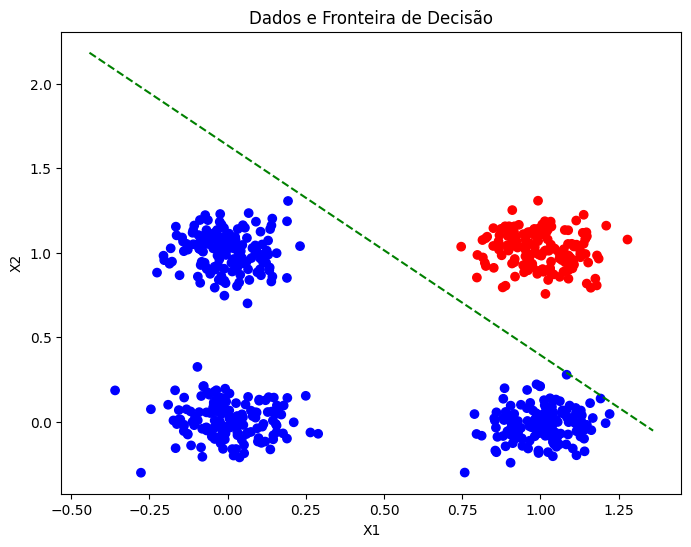

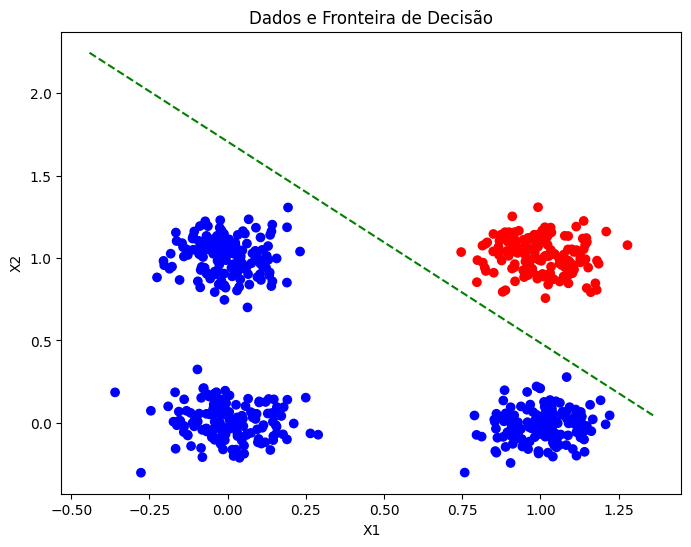

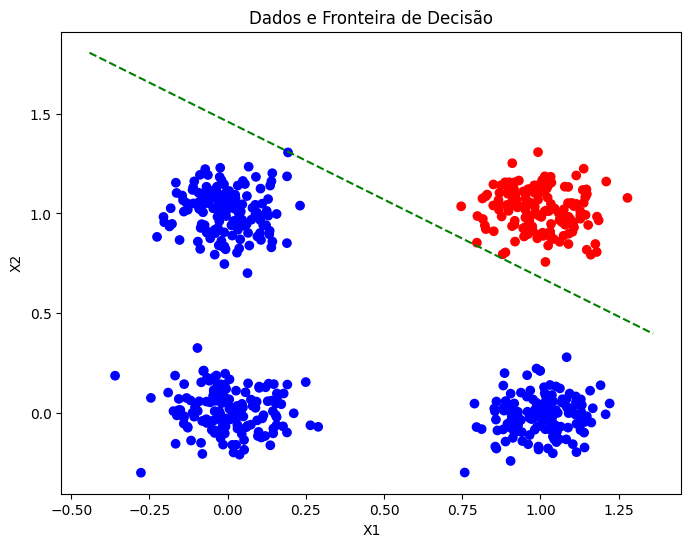

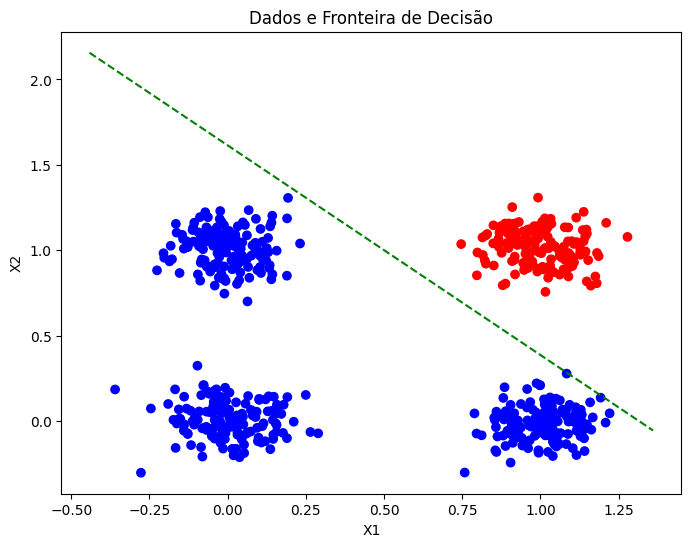

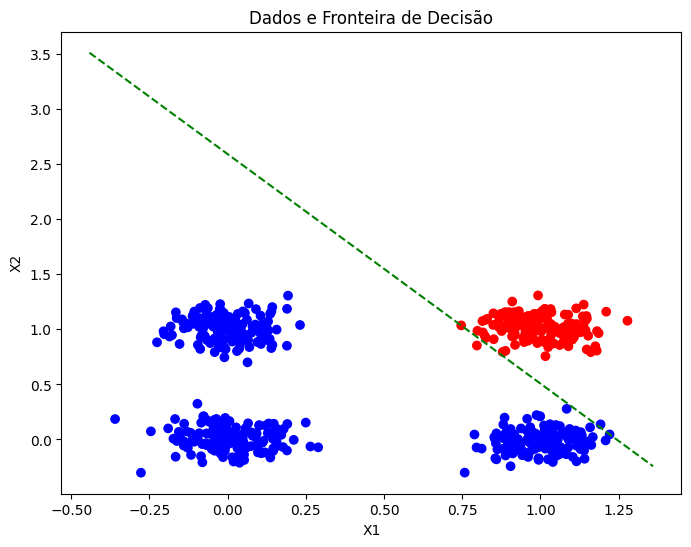

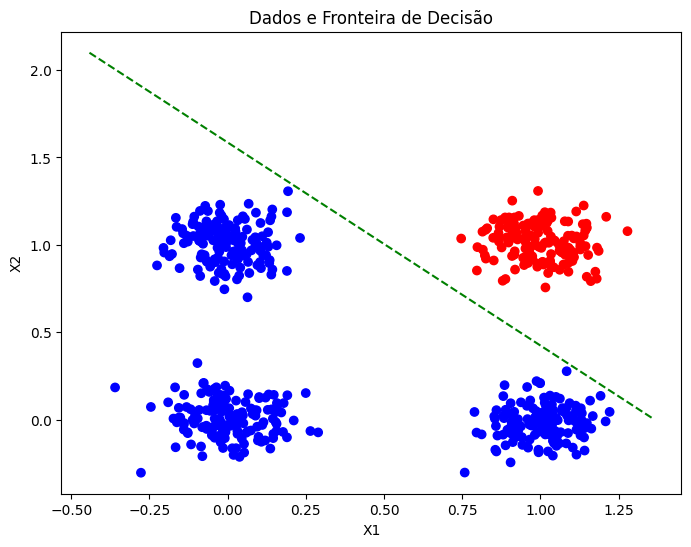

+---------------------+--------------------+-----------------------------+---------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Qtd de Ajustes (Média ± DP) | Menor Num de Épocas para Convergência |
+---------------------+--------------------+-----------------------------+---------------------------------------+
|       η = 0.4       |    (-100, 100)     |        180.72 ± 76.60       |                   7                   |
|       η = 0.4       |    (-0.5, 0.5)     |         14.60 ± 7.77        |                   4                   |
|       η = 0.1       |    (-100, 100)     |        183.58 ± 55.83       |                   18                  |
|       η = 0.1       |    (-0.5, 0.5)     |         4.15 ± 1.80         |                   2                   |
|       η = 0.01      |    (-100, 100)     |        94.64 ± 66.62        |                   70                  |
|       η = 0.01      |    (-0.5, 0.5)     |         0.95 ± 0.33         |      

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

def carregar_dados(caminho_arquivo):
    dados = np.fromfile(caminho_arquivo, dtype=np.float64)
    dados = dados.reshape(-1, 3)
    X = dados[:, :2]
    y = dados[:, 2]
    return X, y

def plotar_dados_e_linha(dados_treinamento, rotulos, perceptron):
    plt.figure(figsize=(8, 6))
    plt.scatter(dados_treinamento[:, 0], dados_treinamento[:, 1], c=rotulos, cmap=plt.cm.bwr)

    x_vals = np.array(plt.gca().get_xlim())
    y_vals = (-perceptron.pesos[0] - perceptron.pesos[1] * x_vals) / perceptron.pesos[2]
    plt.plot(x_vals, y_vals, '--', color='green')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Dados e Fronteira de Decisão')
    plt.show()

def executar_experimento(caminho_arquivo, taxas_aprendizado, intervalos_pesos, repeticoes=10):
    X, y = carregar_dados(caminho_arquivo)
    resultados = []

    for taxa in taxas_aprendizado:
        for intervalo in intervalos_pesos:
            ajustes_lista = []
            epocas_lista = []

            for _ in range(repeticoes):
                perceptron = Perceptron(tamanho_entrada=2, taxa_aprendizado=taxa, intervalo_pesos=intervalo)
                epocas, ajustes = perceptron.treinar(X, y)
                ajustes_lista.append(ajustes)
                epocas_lista.append(epocas)

            media_ajustes = np.mean(ajustes_lista)
            desvio_padrao_ajustes = np.std(ajustes_lista)
            menor_epocas = np.min(epocas_lista)
            resultados.append((taxa, intervalo, media_ajustes, desvio_padrao_ajustes, menor_epocas))

            # Plotando a última repetição para cada configuração
            plotar_dados_e_linha(X, y, perceptron)

    return resultados

def imprimir_tabela(resultados):
    tabela = PrettyTable()
    tabela.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Qtd de Ajustes (Média ± DP)", "Menor Num de Épocas para Convergência"]

    for resultado in resultados:
        taxa, intervalo, media_ajustes, desvio_padrao_ajustes, menor_epocas = resultado
        tabela.add_row([f"η = {taxa}", f"{intervalo}", f"{media_ajustes:.2f} ± {desvio_padrao_ajustes:.2f}", menor_epocas])

    print(tabela)

if __name__ == "__main__":
    taxas_aprendizado = [0.4, 0.1, 0.01]
    intervalos_pesos = [(-100, 100), (-0.5, 0.5)]
    caminho_arquivo = '/content/sample_data/data1.txt'

    resultados = executar_experimento(caminho_arquivo, taxas_aprendizado, intervalos_pesos)
    imprimir_tabela(resultados)


#**2.3. Parte III – Validação Holdout em Problema Não-Linearmente Separável**
Todas as equipes devem considerar o arquivo dataHoldout.txt e apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.

Em seguida, os exemplos devem ser aleatoriamente divididos em duas partições, uma delas contendo 70% dos exemplos (treinamento) e outra contendo 30% (teste). Embora o problema não seja linearmente separável, vamos utilizar os dados de treinamento para obter uma reta de separação das classes com o neurônio Perceptron (solução possível). O neurônio em questão tem função de ativa- ção degrau com θ = 0, os valores de η e de inicialização de pesos devem seguir as recomendações da literatura e os pesos do neurônio devem ser aleatoriamente escolhidos a partir de U(−0,5,+0,5). Execute o algoritmo por 100 épocas, mas a cada época apresente os exemplos disponíveis com conjunto de treinamento em ordem aleatória.

Efetue a previsão da saída deste neurônio para todos os exemplos do conjunto de teste, comparando-a com a saída desejada e responda ao que se pede:

1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;
2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?
3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score. Para estes cálculos, está liberada a utilização de sklearn.metrics;
4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.
Apresente dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Disponha tais gráficos lado a lado.

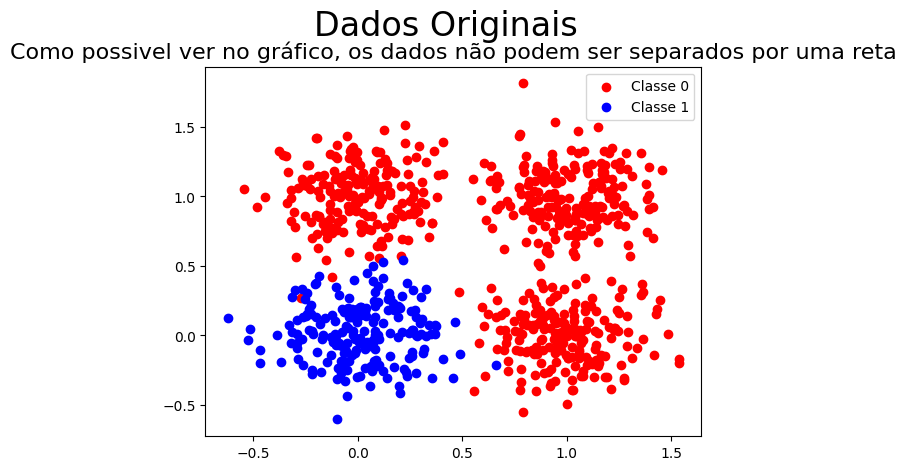

Treinamento concluído em 100 épocas com 302.30000000000007 ajustes totais.


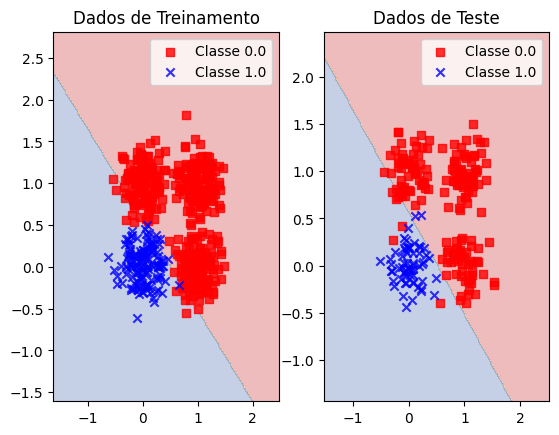

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

path_file = '/content/sample_data/dataHoldout.txt'
X,y = carregar_dados(path_file)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')
plt.legend()
plt.title('Como possivel ver no gráfico, os dados não podem ser separados por uma reta', fontsize=16)
plt.suptitle('Dados Originais', fontsize=24, y=1)
plt.show()

# Dividir os dados em treinamento e teste 70/30 conforme o enunciado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perceptron
ppn = Perceptron(tamanho_entrada=X_train.shape[1], taxa_aprendizado=0.1)
epocas, ajustes_totais = ppn.treinar(X_train, y_train, max_epocas=100)
print(f'Treinamento concluído em {epocas} épocas com {ajustes_totais} ajustes totais.')

# Prever os valores de teste
y_pred = np.array([ppn.prever(x) for x in X_test])

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar os resultados
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = np.array([classifier.prever(x) for x in np.c_[xx1.ravel(), xx2.ravel()]])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Classe {cl}')

plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train, classifier=ppn)
plt.title('Dados de Treinamento')
plt.legend()

plt.subplot(1, 2, 2)
plot_decision_regions(X_test, y_test, classifier=ppn)
plt.title('Dados de Teste')
plt.legend()

plt.show()


1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

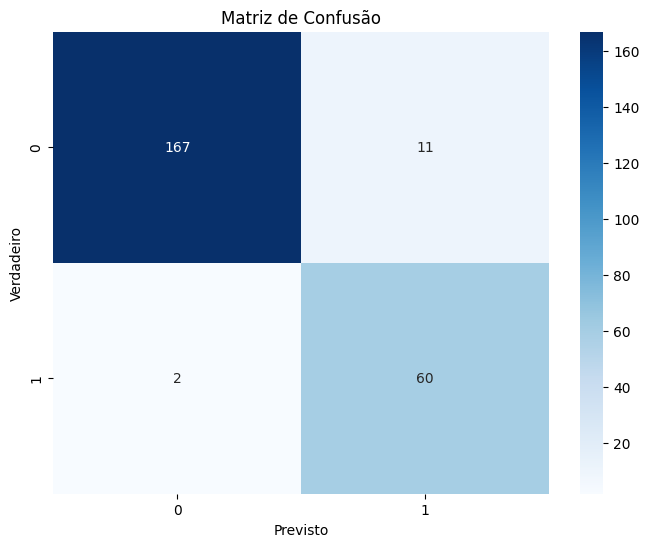

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente
fornecido?

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.96


3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score.
Para estes cálculos, está liberada a utilização de sklearn.metrics;

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precisão: {precision:.2f}')
print(f'Revocação: {recall:.2f}')
print(f'F-Score: {f1:.2f}')

Precisão: 0.85
Revocação: 0.97
F-Score: 0.90


4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de
testes.

Este modelo Perceptron, treinado a partir de um conjunto de dados não linearmente separável, atingiu uma Precisão de 0.85, resultado que demonstra um desempenho bom. Espera-se que ele consiga classificar a maioria das instâncias corretamente, ainda mais aquelas com classe positiva.